In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

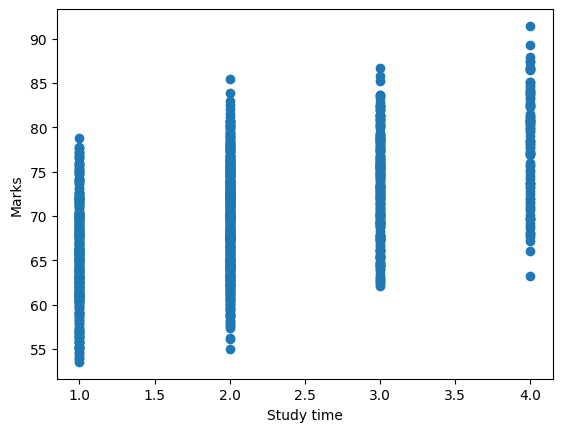

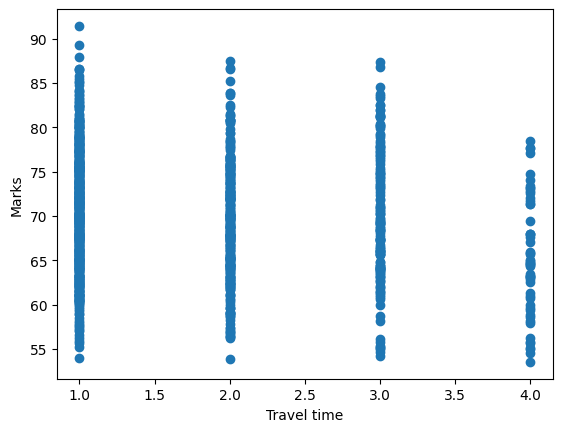

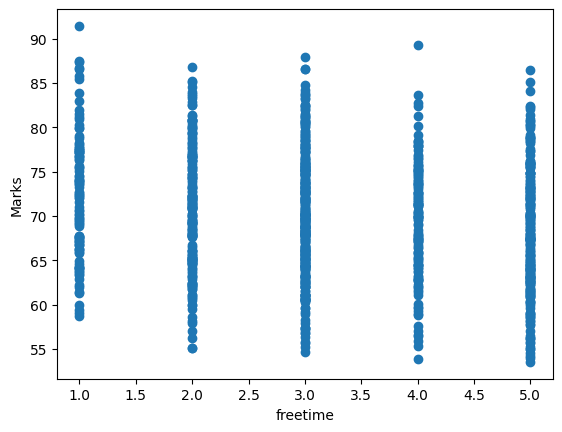

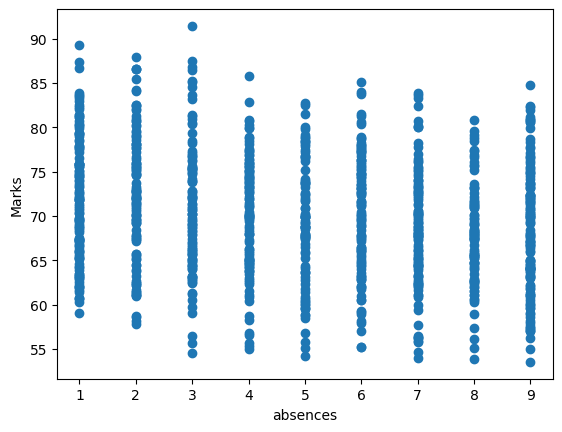

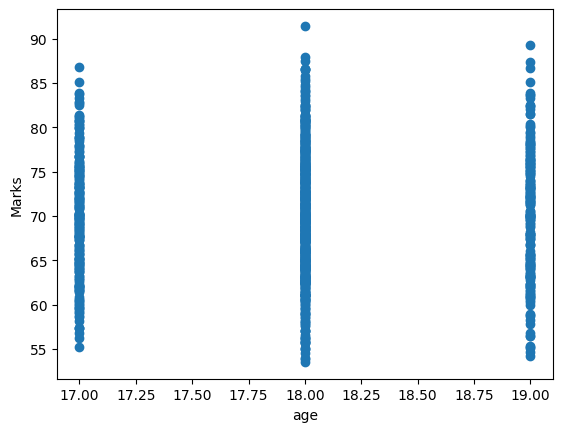

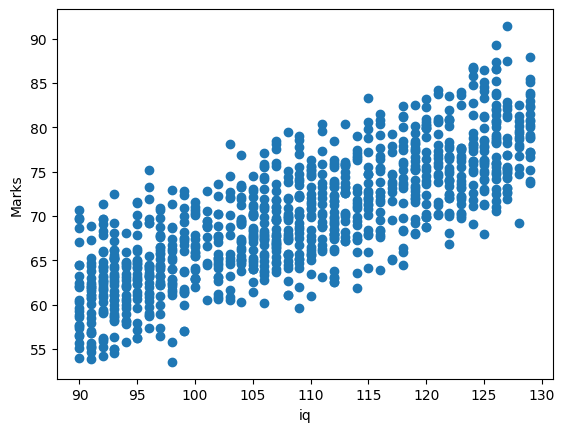

In [50]:
# Use the file namd 'training data' to train the model
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features

plt.scatter(data['studytime'],y_train)
plt.xlabel('Study time')
plt.ylabel('Marks')
plt.show()
plt.scatter(data['traveltime'],y_train)
plt.xlabel('Travel time')
plt.ylabel('Marks')
plt.show()
plt.scatter(data['freetime'],y_train)
plt.xlabel('freetime')
plt.ylabel('Marks')
plt.show()
plt.scatter(data['absences'],y_train)
plt.xlabel('absences')
plt.ylabel('Marks')
plt.show()
plt.scatter(data['age'],y_train)
plt.xlabel('age')
plt.ylabel('Marks')
plt.show()
plt.scatter(data['iq'],y_train)
plt.xlabel('iq')
plt.ylabel('Marks')
plt.show()
# To get an idea whether to add some features or not
# Add some features if required in x_train


# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):


    label_encoders = {}
    for column in [0,1]:
        le = LabelEncoder()
        x_train[:, column] = le.fit_transform(x_train[:, column])
        label_encoders[column] = le
    return x_train

x_train = feature_changing(x_train)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   internet    1000 non-null   object 
 1   sex         1000 non-null   object 
 2   traveltime  1000 non-null   int64  
 3   studytime   1000 non-null   int64  
 4   freetime    1000 non-null   int64  
 5   absences    1000 non-null   int64  
 6   age         1000 non-null   int64  
 7   iq          1000 non-null   int64  
 8   marks       1000 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 70.4+ KB


In [52]:
def z_score(x_train):

  # ---------
    # Your code here
    # Use z-score normalization

  # ------- --
  x_mean = np.mean(x_train,axis=0)
  x_std = np.std(x_train,axis=0)
  x_train = (x_train - x_mean)
  x_train = x_train/x_std

  return x_train,x_std,x_mean

In [54]:
def cost(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------
    y_predict = np.dot(x_train,w) + b
    loss = np.sum((y_train - y_predict)**2)
    loss = loss/np.size(y_train)

    return loss

In [55]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    # Your code here
    # Choose learning rate yourself
  # ---------

    m = len(y_train)  # Number of training examples
    learning_rate=0.001
    epochs=1000



    for i in range(epochs):

        y_pred = np.dot(x_train, w) + b
        error = y_pred - y_train
        dw = (2 / m) * np.dot(x_train.T, error)
        db = (2 / m) * np.sum(error)
        w -= learning_rate * dw
        b -= learning_rate * db
        if i % 100 == 0:
            cost = np.mean((error) ** 2)
            print(f"Iteration {i}: Cost {cost}")

    return w, b



In [56]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Iteration 0: Cost 4987.357715515591
Iteration 100: Cost 3341.4602108833724
Iteration 200: Cost 2238.7417497534952
Iteration 300: Cost 1499.9390156807467
Iteration 400: Cost 1004.9514379840641
Iteration 500: Cost 673.3151602986683
Iteration 600: Cost 451.12150176870546
Iteration 700: Cost 302.2528843619495
Iteration 800: Cost 202.51124788410115
Iteration 900: Cost 135.68429837199437
Iteration 0: Cost 90.9100223202506
Iteration 100: Cost 60.91098821159507
Iteration 200: Cost 40.811374453115945
Iteration 300: Cost 27.344405116655725
Iteration 400: Cost 18.321347529625715
Iteration 500: Cost 12.275749522002535
Iteration 600: Cost 8.225083250749528
Iteration 700: Cost 5.51104912033266
Iteration 800: Cost 3.692580659129503
Iteration 900: Cost 2.474158317582345
Iteration 0: Cost 1.6577798665243761
Iteration 100: Cost 1.1107805334395948
Iteration 200: Cost 0.7442723850460734
Iteration 300: Cost 0.498698582496301
Iteration 400: Cost 0.3341546059543859
Iteration 500: Cost 0.2239033648696203
Iter

In [57]:
ans

array([74.59, 65.28, 79.24, 62.66, 67.83, 75.43, 77.06, 75.94, 72.51,
       71.61, 65.03, 59.09, 70.  , 59.06, 70.12, 74.39, 57.71, 79.34,
       57.53, 60.87, 74.7 , 63.7 , 79.42, 64.52, 79.52, 85.41, 68.14,
       68.28, 62.31, 82.25, 61.25, 69.06, 78.41, 75.8 , 80.11, 69.74,
       77.03, 75.4 , 78.28, 68.64, 69.31, 61.77, 77.7 , 74.53, 67.64,
       64.56, 66.14, 71.91, 75.15, 74.1 , 62.4 , 64.43, 75.73, 71.52,
       80.92, 61.66, 71.93, 85.24, 70.31, 79.31, 69.65, 70.62, 68.92,
       75.74, 62.7 , 74.38, 64.18, 65.25, 63.89, 74.55, 68.26, 76.65,
       62.56, 58.36, 67.91, 65.81, 63.33, 64.3 , 55.68, 72.48, 74.13,
       65.27, 58.4 , 76.02, 71.63, 68.84, 61.17, 68.72, 60.04, 60.18,
       79.69, 72.6 , 74.78, 75.17, 75.78, 80.77, 83.91, 78.67, 67.94,
       59.27, 68.67, 74.25, 77.95, 78.71, 70.18, 79.5 , 73.89, 75.22,
       71.59, 71.15, 62.72, 69.8 , 80.18, 80.08, 69.25, 72.17, 60.44,
       80.5 , 60.36, 70.5 , 72.98, 73.3 , 71.36, 80.24, 70.28, 71.51,
       71.36, 59.74,

In [58]:
y_predict

array([[74.59599478902048],
       [65.28476571264284],
       [79.2361371639312],
       [62.657363444925785],
       [67.82560092588022],
       [75.42608005281082],
       [77.05699837778761],
       [75.9450021825992],
       [72.51022436450376],
       [71.60513634205812],
       [65.03767734430627],
       [59.0856397373016],
       [70.00601137367708],
       [59.06213590710719],
       [70.12035179829734],
       [74.38683573370915],
       [57.706957147773416],
       [79.33653409993727],
       [57.532332034263824],
       [60.873638568425825],
       [74.70192001947369],
       [63.70539573179494],
       [79.42074998902028],
       [64.51570350587889],
       [79.51540292927058],
       [85.40556732478129],
       [68.13632742838729],
       [68.276853024251],
       [62.307384992148144],
       [82.25492914218668],
       [61.25124431733511],
       [69.06237238951712],
       [78.41024399295753],
       [75.79523410885523],
       [80.10674254387465],
       [69.739771797